<a href="https://colab.research.google.com/github/Hardik0175/Graph_Mining/blob/main/Hardik_Sharma_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
import plfit
from scipy.stats import poisson


## **Problem 4**

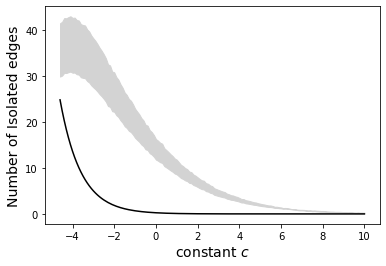

In [4]:
n = 100
REP = 1000 ## repeats
lo = -int(np.floor(np.log(n)*10))/10
if lo<-10:
    lo = -10
C = np.arange(lo,10.1,.1)
ic_avg=[]
for c in C:
    x = []
    for rep in range(REP):
        p = (c+np.log(n)+np.log(np.log(n)))/(2*n)
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        g.simplify(loops=False)
        k = g.degree()
        l = k.count(1)
        x.append(l)
    ic_avg.append(np.mean(x))

## theoretical
th = [(np.exp(-c))/4 for c in C]

## plot
plt.fill_between(C,[x-1.654*np.sqrt(abs(x*(x-1)/n)) for x in ic_avg],
                 [x+1.645*np.sqrt(abs(x*(x-1)/n)) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('Number of Isolated edges',fontsize=14);

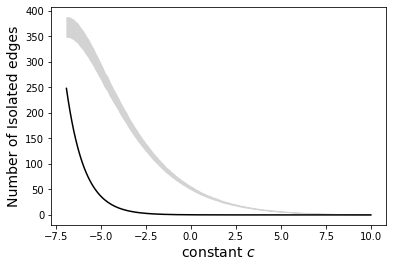

In [5]:
n = 1000
REP = 1000 ## repeats
lo = -int(np.floor(np.log(n)*10))/10
if lo<-10:
    lo = -10
C = np.arange(lo,10.1,.1)
ic_avg=[]
for c in C:
    x = []
    for rep in range(REP):
        p = (c+np.log(n)+np.log(np.log(n)))/(2*n)
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        g.simplify(loops=False)
        k = g.degree()
        l = k.count(1)
        x.append(l)
    ic_avg.append(np.mean(x))

## theoretical
th = [(np.exp(-c))/4 for c in C]

## plot
plt.fill_between(C,[x-1.654*np.sqrt(abs(x*(x-1)/n)) for x in ic_avg],
                 [x+1.645*np.sqrt(abs(x*(x-1)/n)) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('Number of Isolated edges',fontsize=14);
#plt.savefig('connected_100.eps');

## **Problem 5**
For this problem igraph is converted to networkx graph

In [6]:
d = 2
n = 100
REP = 1000 ## repeats
import networkx as nx
import math

cycles = []
for rep in range(REP):
  g = ig.Graph.Degree_Sequence([d for i in range(n)])
  edges = g.get_edgelist()
  G = nx.Graph(edges) 
  cycles.append(int(len(nx.cycle_basis(G))))

print("Result for 100 nodes: " + str(np.mean(cycles)))
print("Theoretical Prediction for number of cycles: " + str(0.5*np.log(n)))
print("Standard deviation: "+str(np.std(cycles)))



Result for 100 nodes: 3.036
Theoretical Prediction for number of cycles: 2.302585092994046
Standard deviation: 1.3223857228509388


In [7]:
d = 2
n = 10000
REP = 1000 ## repeats
import networkx as nx
import math

cycles = []
for rep in range(REP):
  g = ig.Graph.Degree_Sequence([d for i in range(n)])
  edges = g.get_edgelist()
  G = nx.Graph(edges) 
  cycles.append(int(len(nx.cycle_basis(G))))

print("Result for 10000 nodes: " + str(np.mean(cycles)))
print("Theoretical Prediction for number of cycles: " + str(0.5*np.log(n)))
print("Standard deviation: "+str(np.std(cycles)))



Result for 10000 nodes: 5.356
Theoretical Prediction for number of cycles: 4.605170185988092
Standard deviation: 1.9655187610399447


## **Problem 7**


In [8]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2


# Defining Hyperparameters n and p
n = 10000
p = 1/4

# Generating two different graphs
g1 = ig.Graph.Erdos_Renyi(n=n, p=p)
g2 = ig.Graph.Erdos_Renyi(n=n, p=p)

# Generating a new graph by taking union of both graphs
g3 = ig.Graph.union(g1,g2)
g4 = ig.Graph.intersection(g1,g2)

# Finding the density 
density_ofunion = g3.ecount()/ncr(n,2)

density_ofintersection = g4.ecount()/ncr(n,2)

print("G1 actual density: " + str(g1.ecount()/ncr(n,2)))
print("G2 actual density: " + str(g2.ecount()/ncr(n,2)))
print("G1 Union G2 density: " + str(density_ofunion))
print("\n")
print("G1 Intersection  G2 density:" + str(density_ofintersection))
print("G1 + G2: "+ str(g1.ecount()/ncr(n,2)+g2.ecount()/ncr(n,2)))
print("Adding intersection and union of both graphs: "+ str(density_ofunion+ density_ofintersection))


G1 actual density: 0.24999237923792378
G2 actual density: 0.24997133713371336
G1 Union G2 density: 0.4374803280328033


G1 Intersection  G2 density:0.062483388338833885
G1 + G2: 0.49996371637163717
Adding intersection and union of both graphs: 0.49996371637163717


## **The density comes out be around  0.4374803280328033 which is less than 0.5 ( p + p =  1/2)**

Since in the union of individual graphs, it is possible that some edges are counted 1 time but in reality, these edges are in both of the graphs.
So the total number of edges of union is less than expected.

*Although it is important to note that summation of union and itersection is equal to summation of density of both graphs*

## **Problem 8**

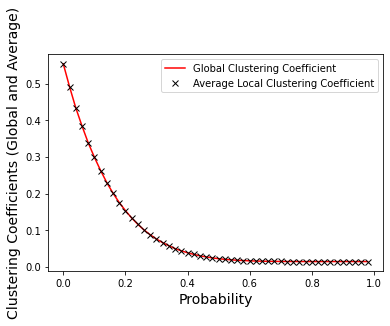

In [9]:
import networkx as nx
from igraph import *
x = 50
avg_clus = []
glob_clus = []
step = 1/x
D = np.arange(0,1,step) 
#watts_strogatz = nx.watts_strogatz_graph(200,2,0.15)
for i in range(x):
  p = i/x
  watts  = ig.Graph.Watts_Strogatz(2,100,8,p)
  avg_clus.append(ig.Graph.transitivity_undirected(watts))
  glob_clus.append(ig.Graph.transitivity_avglocal_undirected(watts))

plt.plot(D,glob_clus,color='red',label = "Global Clustering Coefficient")
plt.plot(D,avg_clus,"x",color='black',label = "Average Local Clustering Coefficient")
plt.xlabel('Probability',fontsize=14)
plt.ylabel('Clustering Coefficients (Global and Average)',fontsize=14)
leg = plt.legend()          

## **Problem 9**
The value of m = 5 and *n* = 10,000

(13, 2.972296053453414)


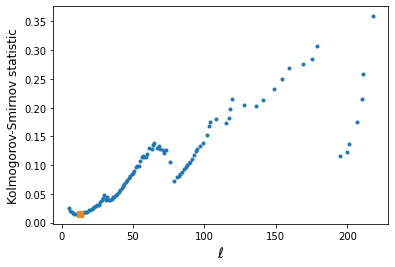

In [10]:
n = 10000
m = 5

g_pref = ig.Graph.Barabasi(n,m,implementation='psumtree')

d = g_pref.degree()
X = plfit.plfit(d)
print(X.plfit())
ax = plt.figure(1)
ax = X.xminvsks()
ax.set_xlabel(r'$\ell$',fontsize=14)
ax.set_ylabel('Kolmogorov-Smirnov statistic',fontsize=12);

In [15]:
X.test_pl(niter=100)

p(100) = 1.000


(1.0, array([0.02386706, 0.02251593, 0.02217091, 0.02131062, 0.02514014,
        0.02377696, 0.02345957, 0.02174465, 0.02633899, 0.02467895,
        0.02849871, 0.02281109, 0.02834811, 0.02325649, 0.02633981,
        0.02188054, 0.01813621, 0.02611172, 0.02408314, 0.02622775,
        0.02872121, 0.0243563 , 0.02218022, 0.02446128, 0.02179417,
        0.02423587, 0.02475309, 0.02643581, 0.02523883, 0.01871088,
        0.02858711, 0.0265892 , 0.02727061, 0.02047675, 0.0209217 ,
        0.02832574, 0.02678437, 0.02072724, 0.02571303, 0.02436563,
        0.02775589, 0.02379884, 0.02664754, 0.02603202, 0.02306638,
        0.02000993, 0.02765612, 0.02279308, 0.02243919, 0.02249145,
        0.02193972, 0.02672089, 0.02523585, 0.02324955, 0.0244626 ,
        0.02513766, 0.02249712, 0.02718564, 0.02766001, 0.02300162,
        0.02740119, 0.02329388, 0.0256246 , 0.03037394, 0.0202444 ,
        0.02646808, 0.02553643, 0.02415094, 0.02227189, 0.02612622,
        0.0232552 , 0.01825256, 0.02350902,

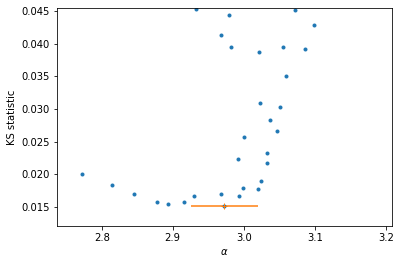

In [16]:
ax = plt.figure(1)
ax = X.alphavsks()

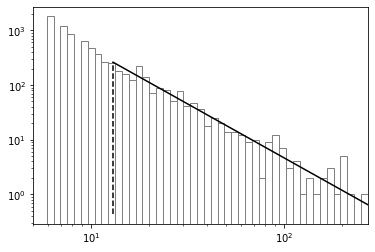

In [17]:
ax = plt.figure(2)
ax = X.plotpdf(plcolor='k',histcolor='grey')


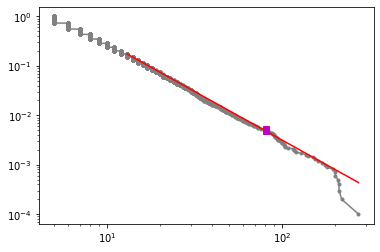

In [18]:
X.plotcdf(pointcolor='grey', pointmarker='.',zoom=False)